In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
digits.data[20].reshape(8,8)

array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

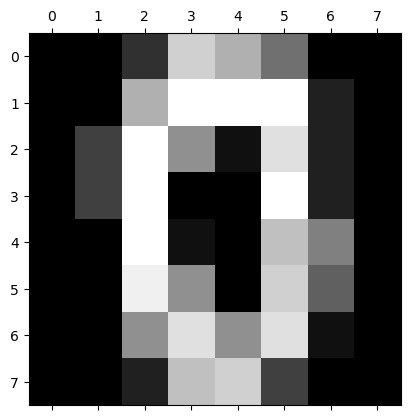

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.data[20].reshape(8,8))

In [17]:
import pandas as pd
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
x = df
y = digits.target

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
model.score(x_test, y_test)

0.9722222222222222

### Using PCA to use only impactful columns

In [35]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [36]:
x_scaled.shape

(1797, 64)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(0.95) #you can also use PCA(n_components=50)
pca_x_scaled = pca.fit_transform(x_scaled)
pca_x_scaled

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [43]:
pca_x_scaled.shape #some of the columns are dropped which was not contrubution much

(1797, 40)

In [49]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [45]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_x_scaled, y, test_size = 0.2)

In [47]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression()
model_pca.fit(x_train_pca, y_train_pca)

LogisticRegression()

In [48]:
model_pca.score(x_test_pca, y_test_pca)

0.9611111111111111